In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the requests library.
import requests
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the API key.
from config import weather_api_key
# Import the time module.
import time
# Import linregress
from scipy.stats import linregress


# Get today's date in seconds.
today = time.strftime("%x")
today

'07/18/21'

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | labuhan
Processing Record 3 of Set 1 | torbay
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | abu samrah
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | kaitangata
Processing Record 9 of Set 1 | pangody
Processing Record 10 of Set 1 | lorengau
Processing Record 11 of Set 1 | cherskiy
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | mar del plata
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | salamiyah
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | saint marys
Processing Record

Processing Record 36 of Set 4 | ormara
Processing Record 37 of Set 4 | atuona
Processing Record 38 of Set 4 | chokurdakh
Processing Record 39 of Set 4 | plettenberg bay
Processing Record 40 of Set 4 | airai
Processing Record 41 of Set 4 | isangel
Processing Record 42 of Set 4 | bella vista
Processing Record 43 of Set 4 | anadyr
Processing Record 44 of Set 4 | geraldton
Processing Record 45 of Set 4 | fairbanks
Processing Record 46 of Set 4 | aklavik
Processing Record 47 of Set 4 | nouadhibou
Processing Record 48 of Set 4 | luwuk
Processing Record 49 of Set 4 | la ronge
Processing Record 50 of Set 4 | leh
Processing Record 1 of Set 5 | leshukonskoye
Processing Record 2 of Set 5 | galesong
Processing Record 3 of Set 5 | kumluca
Processing Record 4 of Set 5 | vidalia
Processing Record 5 of Set 5 | atambua
Processing Record 6 of Set 5 | tefe
Processing Record 7 of Set 5 | victoria
Processing Record 8 of Set 5 | storm lake
Processing Record 9 of Set 5 | khatanga
Processing Record 10 of Set 

Processing Record 27 of Set 8 | lakatoro
Processing Record 28 of Set 8 | ancud
Processing Record 29 of Set 8 | roma
Processing Record 30 of Set 8 | souillac
Processing Record 31 of Set 8 | la paz
Processing Record 32 of Set 8 | sisimiut
Processing Record 33 of Set 8 | iralaya
Processing Record 34 of Set 8 | merauke
Processing Record 35 of Set 8 | marsabit
Processing Record 36 of Set 8 | nalut
Processing Record 37 of Set 8 | horta
Processing Record 38 of Set 8 | whitehorse
Processing Record 39 of Set 8 | aubiere
Processing Record 40 of Set 8 | vardo
Processing Record 41 of Set 8 | inhambane
Processing Record 42 of Set 8 | port lincoln
Processing Record 43 of Set 8 | kattivakkam
Processing Record 44 of Set 8 | klaksvik
Processing Record 45 of Set 8 | mukhanovo
City not found. Skipping...
Processing Record 46 of Set 8 | ubinskoye
Processing Record 47 of Set 8 | toamasina
Processing Record 48 of Set 8 | chulumani
Processing Record 49 of Set 8 | banmankhi
Processing Record 50 of Set 8 | bed

Processing Record 10 of Set 12 | viedma
Processing Record 11 of Set 12 | saint-leu
Processing Record 12 of Set 12 | paros
Processing Record 13 of Set 12 | ballina
Processing Record 14 of Set 12 | kuytun
Processing Record 15 of Set 12 | itoman
Processing Record 16 of Set 12 | mogadishu
Processing Record 17 of Set 12 | stramtura
Processing Record 18 of Set 12 | shahrud
Processing Record 19 of Set 12 | abha
Processing Record 20 of Set 12 | port augusta
Processing Record 21 of Set 12 | cayenne
Processing Record 22 of Set 12 | gallup
Processing Record 23 of Set 12 | nuuk
Processing Record 24 of Set 12 | la malbaie
Processing Record 25 of Set 12 | lincoln
Processing Record 26 of Set 12 | payo
Processing Record 27 of Set 12 | road town
Processing Record 28 of Set 12 | aleksandrovsk-sakhalinskiy
Processing Record 29 of Set 12 | constitucion
Processing Record 30 of Set 12 | afua
Processing Record 31 of Set 12 | hay river
Processing Record 32 of Set 12 | saint-augustin
Processing Record 33 of Se

In [7]:
len(city_data)

541

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,71.76,60,100,24.05,PF,2021-07-18 21:59:07
1,Labuhan,-6.8844,112.2051,75.43,86,26,6.67,ID,2021-07-18 21:59:07
2,Torbay,47.6666,-52.7314,75.97,63,40,19.57,CA,2021-07-18 21:59:07
3,Ushuaia,-54.8000,-68.3000,40.66,87,40,8.05,AR,2021-07-18 21:58:55
4,Cape Town,-33.9258,18.4232,60.89,65,0,4.00,ZA,2021-07-18 21:58:24
5,Abu Samrah,35.3029,37.1841,83.66,37,0,7.87,SY,2021-07-18 21:59:07
6,Vaini,-21.2000,-175.2000,78.96,83,20,6.91,TO,2021-07-18 21:57:30
7,Kaitangata,-46.2817,169.8464,46.90,93,99,3.65,NZ,2021-07-18 21:59:08
8,Pangody,65.8500,74.4859,51.76,61,16,7.36,RU,2021-07-18 21:59:08
9,Lorengau,-2.0226,147.2712,81.05,76,100,0.58,PG,2021-07-18 21:59:08


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-07-18 21:59:07,-23.1203,-134.9692,71.76,60,100,24.05
1,Labuhan,ID,2021-07-18 21:59:07,-6.8844,112.2051,75.43,86,26,6.67
2,Torbay,CA,2021-07-18 21:59:07,47.6666,-52.7314,75.97,63,40,19.57
3,Ushuaia,AR,2021-07-18 21:58:55,-54.8000,-68.3000,40.66,87,40,8.05
4,Cape Town,ZA,2021-07-18 21:58:24,-33.9258,18.4232,60.89,65,0,4.00
5,Abu Samrah,SY,2021-07-18 21:59:07,35.3029,37.1841,83.66,37,0,7.87
6,Vaini,TO,2021-07-18 21:57:30,-21.2000,-175.2000,78.96,83,20,6.91
7,Kaitangata,NZ,2021-07-18 21:59:08,-46.2817,169.8464,46.90,93,99,3.65
8,Pangody,RU,2021-07-18 21:59:08,65.8500,74.4859,51.76,61,16,7.36
9,Lorengau,PG,2021-07-18 21:59:08,-2.0226,147.2712,81.05,76,100,0.58


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


## Data plots

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

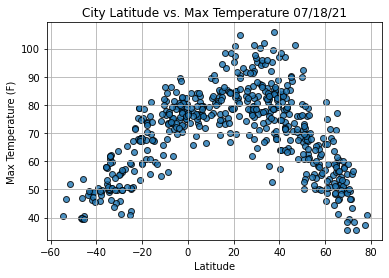

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

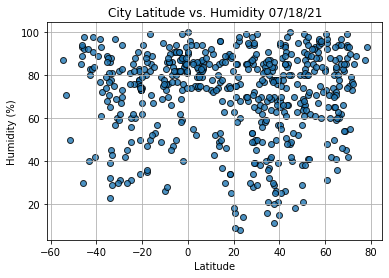

In [13]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

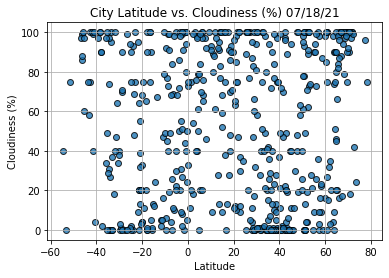

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

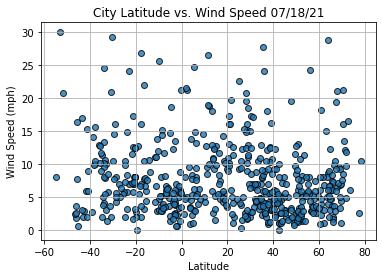

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

## adding linear regression

In [16]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

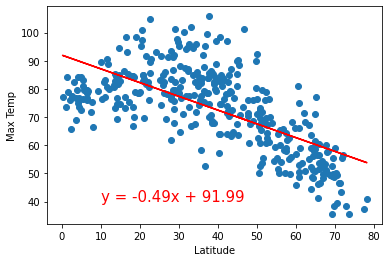

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

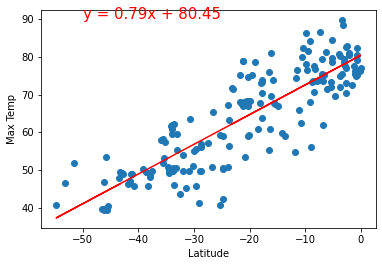

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

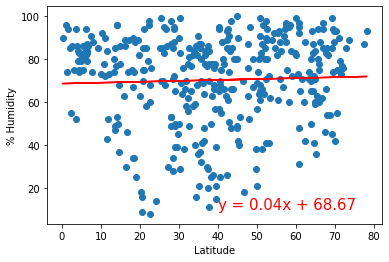

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

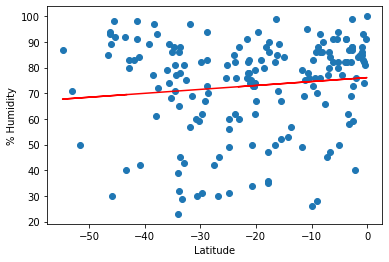

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

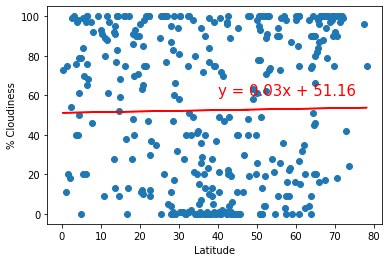

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,60))

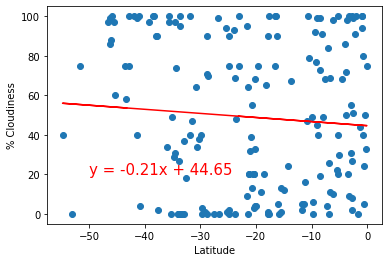

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,20))

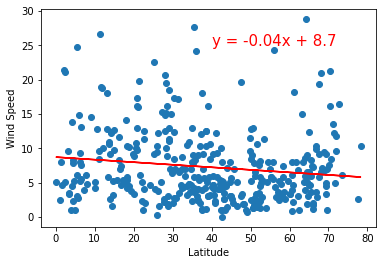

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

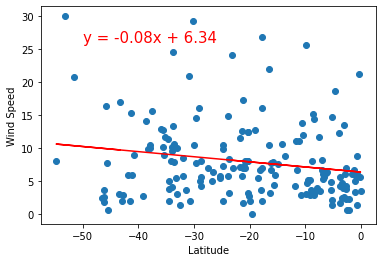

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,26))
